# Анализ системы метрик приложения

### Описание проекта: 
Анализ причин падения выручки в мобильном приложении с помощью когортного анализа и метрик юнит-экономики (LTV, CAC, ROI), а также оценка эффективности рекламных каналов.

## Цели и задачи проекта
Цель проекта:
- Выявить причины стагнации выручки в развлекательном приложении Procrastinate Pro+ после запуска нового спортивного контента и изменения маркетинговой стратегии.

Задачи проекта: 
- Провести анализ юнит-экономики продукта в динамике за первые 28 дней с момента привлечения пользователя.

- Выявить причины стагнации выручки после запуска нового контента и изменения маркетинговой стратегии.

- Определить, какие источники привлечения пользователей приносят прибыль, а какие не выходят на уровень окупаемости.

- Сформулировать рекомендации для отдела маркетинга по оптимизации рекламного бюджета.

### Описание данных


1. Датасет `ppro_visits.csv` — информация о посещениях приложения пользователями, которые зарегистрировались с 1 апреля 2024 года по 30 ноября 2024 года:
    - `user_id` — уникальный идентификатор пользователя;
    - `region` — страна пользователя;
    - `device` — категория устройства пользователя;
    - `channel` — идентификатор рекламного источника, из которого пришёл пользователь;
    - `session_start` — дата и время начала сессии;
    - `session_end` — дата и время окончания сессии.

2. Датасет `ppro_orders.csv` — информация о покупках:
    - `user_id` — уникальный идентификатор пользователя, который сделал покупку;
    - `event_dt` — дата и время покупки;
    - `revenue` — выручка.

3. Датасет `ppro_costs.csv` — информация о затратах на маркетинг:
    - `dt` — дата
    - `channel` — идентификатор рекламного источника;
    - `costs` — затраты на этот рекламный источник в этот день.
    



## Загрузка и предобработка данных

Загрузите данные и получите основную информацию о них. Проведите необходимую предобработку. Основную информацию о данных и предобработке зафиксируйте в кратком промежуточном выводе.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from itertools import product


In [ ]:
visits=pd.read_csv('', parse_dates=['session_start','session_end'])
orders=pd.read_csv('', parse_dates=['event_dt'])
costs=pd.read_csv('', parse_dates=['dt'])

In [3]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161865 entries, 0 to 161864
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        161865 non-null  int64         
 1   region         161865 non-null  object        
 2   device         161865 non-null  object        
 3   channel        161865 non-null  object        
 4   session_start  161865 non-null  datetime64[ns]
 5   session_end    161865 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 7.4+ MB


In [4]:
visits.head()

,user_id,region,device,channel,session_start,session_end
0,631105188566,India,desktop,MediaTornado,2024-04-01 03:48:00,2024-04-01 04:19:00
1,892885906464,India,tv,RocketSuperAds,2024-04-01 00:47:00,2024-04-01 01:14:00
2,517003690029,India,mobile,MediaTornado,2024-04-01 17:31:00,2024-04-01 17:53:00
3,185156659289,India,mobile,MediaTornado,2024-04-01 14:36:00,2024-04-01 14:51:00
4,409503040345,India,mobile,RocketSuperAds,2024-04-01 08:25:00,2024-04-01 08:45:00


In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33893 entries, 0 to 33892
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   33893 non-null  int64         
 1   event_dt  33893 non-null  datetime64[ns]
 2   revenue   33893 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 794.5 KB


In [6]:
orders.head()

,user_id,event_dt,revenue
0,771951256319,2024-04-01 05:56:26,2.99
1,829942381059,2024-04-01 14:55:02,2.99
2,727879856738,2024-04-01 22:15:09,14.99
3,481270888930,2024-04-01 06:05:14,2.99
4,844695029762,2024-04-01 01:19:52,2.99


In [7]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       976 non-null    datetime64[ns]
 1   channel  976 non-null    object        
 2   costs    976 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 23.0+ KB


In [8]:
costs.head()

,dt,channel,costs
0,2024-04-01,FaceBoom,124.938874
1,2024-04-02,FaceBoom,88.147779
2,2024-04-03,FaceBoom,120.779457
3,2024-04-04,FaceBoom,98.981253
4,2024-04-05,FaceBoom,109.044760


Данные в исходных датасетах соответствуют описанию, типы данных корректны. Пропуски отсутствуют.

In [9]:
for name in ['visits', 'orders', 'costs']:
    dataset = locals()[name]  # получаем переменную по имени
    print(f'Датасет {name} содержит {dataset.duplicated().sum()} дубликатов')

Датасет visits содержит 0 дубликатов
Датасет orders содержит 0 дубликатов
Датасет costs содержит 0 дубликатов


Дубликаты также отсутствуют.

## Подготовка данных к когортному анализу

Подготовим данные к когортному анализу с учётом того, что вы будем изучать окупаемость привлечения пользователей за первые 28 дней.

Для каждого пользователя определим:
- дату первой сессии (дата привлечения пользователя, `first_dt`);
- канал привлечения (`first_channel`);
- стоимость привлечения пользователя (`cac`).


In [10]:
#Добавим столбец - для каждого пользователя дата первого посещения приложения
visits['first_activity']=visits.groupby('user_id')['session_start'].transform('min').dt.date


In [11]:
#Добавим столбец - для каждого пользователя канал, через который было первое посещение
visits=visits.sort_values(by='session_start').reset_index(drop=True)
visits['first_channel']=visits.groupby('user_id')['channel'].transform('first')
profiles=visits[['user_id','first_channel','first_activity']].drop_duplicates()

In [12]:
#Посчитаем количество уникальных пользователей, пришедших в приложение с соответствующих каналов привлечения в каждый из дней
first_activities=profiles.groupby(['first_channel','first_activity'])['user_id'].nunique().reset_index().rename(columns={'user_id':'users_qty'})
first_activities

,first_channel,first_activity,users_qty
0,FaceBoom,2024-04-01,133
1,FaceBoom,2024-04-02,94
2,FaceBoom,2024-04-03,133
3,FaceBoom,2024-04-04,105
4,FaceBoom,2024-04-05,110
...,...,...,...
971,TipTop,2024-11-26,76
972,TipTop,2024-11-27,93
973,TipTop,2024-11-28,87
974,TipTop,2024-11-29,93


In [13]:
#Изменим формат в столбце dt для последующего соединения датасетов
costs['dt']=costs['dt'].dt.date

In [14]:
#Присоединим данные о затратах на привлечение пользователей
costs_per_users=pd.merge(first_activities,costs,left_on=['first_activity','first_channel'],right_on=['dt','channel'],how='outer')
costs_per_users=costs_per_users.drop(['dt','channel'],axis=1)

In [15]:
costs_per_users.head()

,first_channel,first_activity,users_qty,costs
0,FaceBoom,2024-04-01,133,124.938874
1,MediaTornado,2024-04-01,80,19.932806
2,RocketSuperAds,2024-04-01,70,62.050000
3,TipTop,2024-04-01,73,54.200101
4,FaceBoom,2024-04-02,94,88.147779


In [16]:
# Рассчитаем CAC для каждого дня и канала привлечения
costs_per_users['CAC']=costs_per_users['costs']/costs_per_users['users_qty']

In [17]:
#Соединим данные о дате первой активности пользователей и каналам их привлечения и стоимость привлечения
first_activities=pd.merge(first_activities,costs_per_users[['first_channel','first_activity','CAC']],on=['first_activity','first_channel'])
first_activities.head()

,first_channel,first_activity,users_qty,CAC
0,FaceBoom,2024-04-01,133,0.939390
1,FaceBoom,2024-04-02,94,0.937742
2,FaceBoom,2024-04-03,133,0.908116
3,FaceBoom,2024-04-04,105,0.942679
4,FaceBoom,2024-04-05,110,0.991316


In [18]:
profiles=pd.merge(profiles[['user_id','first_activity','first_channel']],first_activities[['first_activity','first_channel','CAC']],on=['first_activity','first_channel'])

In [19]:
profiles.head()

,user_id,first_activity,first_channel,CAC
0,767410614400,2024-04-01,MediaTornado,0.249160
1,641772204272,2024-04-01,MediaTornado,0.249160
2,934895210751,2024-04-01,RocketSuperAds,0.886429
3,226472994774,2024-04-01,FaceBoom,0.939390
4,686701513307,2024-04-01,MediaTornado,0.249160


## Анализ месячной динамики основных метрик продукта

Изучим динамику активности пользователей и их вовлечённости в продукт. Рассчитаем по всем данным значения DAU, MAU и Stickiness и визуализируем их. Активными будем считать всех пользователей, которые взаимодействовали с приложением.


In [20]:
#Добавим столбец с месяцем сессии для последующей группировки
visits['session_month']=visits['session_start'].dt.to_period('M')

In [21]:
#Приведем столбцы к формату последующей группировки
visits['session_start']=visits['session_start'].dt.date

In [22]:
#Посчитаем количество уникальных пользователей на каждый день
active_users_daily=visits.groupby('session_start')['user_id'].nunique().reset_index().rename(columns={'user_id':'DAU'})
active_users_daily['session_month']=pd.to_datetime(active_users_daily['session_start']).dt.to_period('M')
active_users_daily.head()


,session_start,DAU,session_month
0,2024-04-01,356,2024-04
1,2024-04-02,410,2024-04
2,2024-04-03,481,2024-04
3,2024-04-04,472,2024-04
4,2024-04-05,533,2024-04


In [23]:
#Посчитаем количество уникальных пользователей на каждый месяц
active_users_monthly=visits.groupby('session_month')['user_id'].nunique().reset_index().rename(columns={'user_id':'MAU'})
active_users_monthly.head()

,session_month,MAU
0,2024-04,9069
1,2024-05,10849
2,2024-06,10240
3,2024-07,10864
4,2024-08,11977


In [24]:
#Рассчитаем среднее DAU для последующего расчета коэффициента "залипательности"
dau_mean=active_users_daily.groupby('session_month')['DAU'].mean().reset_index()
dau_mean.head()

,session_month,DAU
0,2024-04,488.333333
1,2024-05,576.967742
2,2024-06,580.366667
3,2024-07,615.000000
4,2024-08,681.193548


In [25]:
#Объединим для рассчета "залипательности"
dau_mau_stickiness=pd.merge(active_users_monthly,dau_mean,on='session_month')
dau_mau_stickiness['stickiness']=dau_mau_stickiness['DAU']/dau_mau_stickiness['MAU']*100
dau_mau_stickiness=dau_mau_stickiness.set_index('session_month')
dau_mau_stickiness

,MAU,DAU,stickiness
session_month,,,
2024-04,9069,488.333333,5.384644
2024-05,10849,576.967742,5.318165
2024-06,10240,580.366667,5.667643
2024-07,10864,615.000000,5.660898
2024-08,11977,681.193548,5.687514
2024-09,12089,724.100000,5.989743
2024-10,13036,773.193548,5.931218
2024-11,14097,868.133333,6.158284


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2596\3945348056.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(dau_mau_stickiness.index)


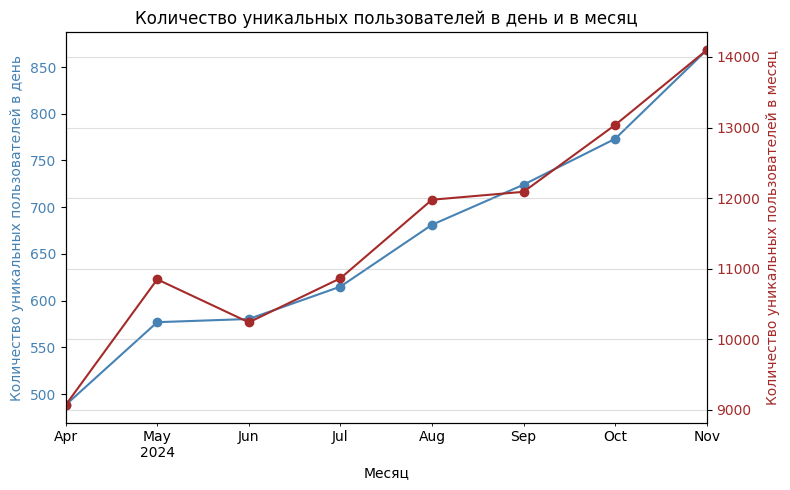

In [26]:
fig, ax1 = plt.subplots(figsize=(8,5))

dau_mau_stickiness['DAU'].plot(
    kind='line', 
    ax=ax1, 
    marker='o',
    color='steelblue')
ax1.set_ylabel('Количество уникальных пользователей в день', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1.set_xticklabels(dau_mau_stickiness.index)
plt.xlabel('Месяц')
ax2 = ax1.twinx()
dau_mau_stickiness['MAU'].plot(kind='line', color='brown', ax=ax2, marker='o')
ax2.set_ylabel('Количество уникальных пользователей в месяц', color='brown')
ax2.tick_params(axis='y', labelcolor='brown')

plt.title('Количество уникальных пользователей в день и в месяц')
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

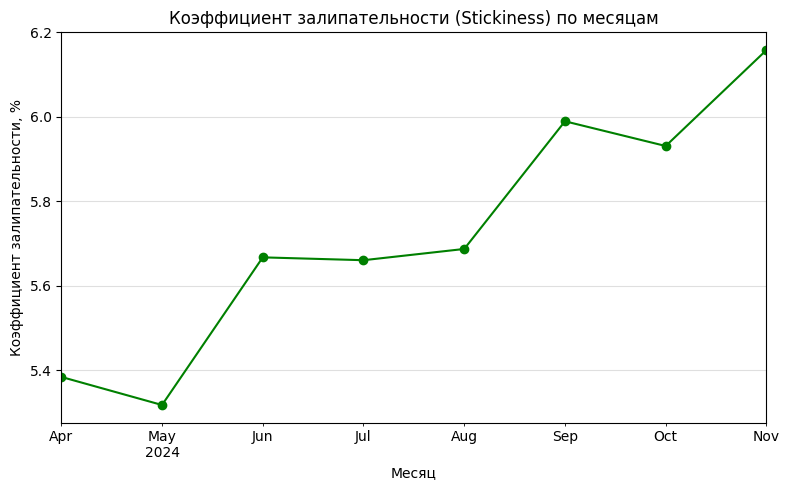

In [27]:
dau_mau_stickiness['stickiness'].plot(kind='line',
                        marker='o', title='Коэффициент залипательности (Stickiness) по месяцам',
            figsize=(8,5),color='green')
plt.xlabel('Месяц')
plt.ylabel('Коэффициент залипательности, %')
plt.tight_layout()
plt.grid(alpha=0.4)
plt.show()

На построенных графиках можно обратить внимание, что все метрики демонстрируют рост. В мае наблюдается минимум метрики "залипательности" из-за сильного роста MAU при менее резком росте DAU (пользователи приходили в продукт, но не регулярно). С июня наблюдается рост Stickiness (как раз когда был введен новый контент) и осенью рост метрики продожается. В сентябре наблюдается немного повышенное значение "залипательности" относительно общего тренда - DAU рос несколько быстрее, чем MAU - пользователи пользовались продуктом с большей регулярностью, чем с апреля по август и октябре. Возможно, применялись инструменты по "возвращению" пользователей в продукт (например, привлекающие внимание уведомления).

В разрезе каждого месяца привлечения новых пользователей рассчитаем:
- Среднюю стоимость привлечения пользователя (CAC).
- Значение LTV и ROI с учётом покупок, совершённых за 28 дней с момента привлечения.

In [28]:
#Рассчитаем средний CAC по месяцам
first_activities['first_month']=pd.to_datetime(first_activities['first_activity']).dt.to_period('M')


Поскольку мы будем рассчитывать LTV и ROI за период 28 дней после первой активности пользователя в приложении, а исходные данные - до 30.11.2024, то исключим из анализа когорты ноября, т.к. привлеченные в ноябре пользователи "не успели прожить" в продукте 28 дней.  

In [29]:
#Исключаем данные за ноябрь и группируем для рассчета среднего CAC за месяц
metrics_df=first_activities[first_activities['first_month']!='2024-11'].groupby('first_month')['CAC'].mean().reset_index()
metrics_df

,first_month,CAC
0,2024-04,0.703939
1,2024-05,0.724127
2,2024-06,0.895592
3,2024-07,0.948972
4,2024-08,1.042941
5,2024-09,1.064759
6,2024-10,1.168874


In [30]:
#Рассчитаем количество новых пользователей приложения за каждый месяц
visits['first_month'] = pd.to_datetime(visits['first_activity']).dt.to_period('M')
metrics_df = metrics_df.merge(
    visits.groupby('first_month')['user_id'].nunique().reset_index().rename(columns={'user_id': 'new_users'}),
    on='first_month',
    how='left'
)

In [31]:
profiles['first_month']=pd.to_datetime(profiles['first_activity']).dt.to_period('M')

In [32]:
#Объединим данные о заказах с данными о канале, с которого пришел пользователь
users_orders=pd.merge(profiles,orders,on='user_id',how='left')

#отфильтруем заказы, совершенные в течение первых 28 дней
orders_28_days= users_orders[
    ((users_orders['event_dt'] <= (pd.to_datetime(users_orders['first_activity']) + pd.Timedelta(days=27))) | 
    users_orders['revenue'].isna())
]
orders_28_days['revenue']=orders_28_days['revenue'].fillna(0)

#просуммируем выручку по отфильтрованным заказам 
ltv_monthly=orders_28_days.groupby('first_month')['revenue'].sum().reset_index().rename(columns={'revenue':'LTV_total'})
ltv_monthly

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2596\1474057369.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_28_days['revenue']=orders_28_days['revenue'].fillna(0)


,first_month,LTV_total
0,2024-04,7319.45
1,2024-05,8029.61
2,2024-06,7344.67
3,2024-07,9883.23
4,2024-08,10244.43
5,2024-09,9984.21
6,2024-10,11301.15
7,2024-11,8865.57


In [33]:
metrics_df=pd.merge(metrics_df,ltv_monthly,on='first_month')


In [34]:
#Вычислим LTV на одного привлеченного в этом месяце пользователя
metrics_df['LTV']=metrics_df['LTV_total']/metrics_df['new_users']
metrics_df=metrics_df.drop(['LTV_total','new_users'],axis=1)


In [35]:
#Вычислим ROI 
metrics_df['ROI']=(metrics_df['LTV']-metrics_df['CAC'])/metrics_df['CAC']*100
metrics_df

,first_month,CAC,LTV,ROI
0,2024-04,0.703939,0.807085,14.652663
1,2024-05,0.724127,0.820269,13.276968
2,2024-06,0.895592,0.842375,-5.942123
3,2024-07,0.948972,1.130546,19.133715
4,2024-08,1.042941,1.076322,3.200638
5,2024-09,1.064759,1.085476,1.945695
6,2024-10,1.168874,1.187096,1.558869


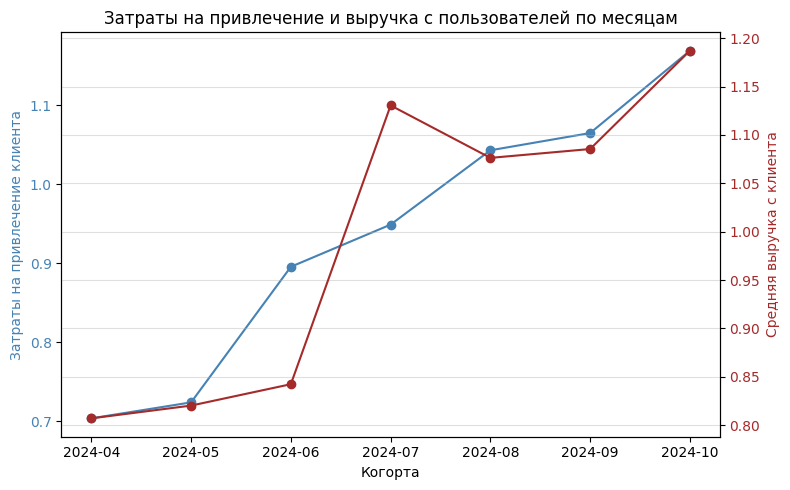

In [36]:
fig, ax1 = plt.subplots(figsize=(8,5))

metrics_df['CAC'].plot(
    kind='line', 
    ax=ax1, 
    marker='o',
    color='steelblue')
ax1.set_ylabel('Затраты на привлечение клиента', color='steelblue')
ax1.set_xticks(range(len(metrics_df)))  
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1.set_xticklabels(metrics_df['first_month'])
plt.xlabel('Когорта')

ax2 = ax1.twinx()
metrics_df['LTV'].plot(kind='line', color='brown', ax=ax2, marker='o')
ax2.set_ylabel('Средняя выручка с клиента', color='brown')
ax2.tick_params(axis='y', labelcolor='brown')

plt.title('Затраты на привлечение и выручка с пользователей по месяцам')
plt.xlabel('Когорта')
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

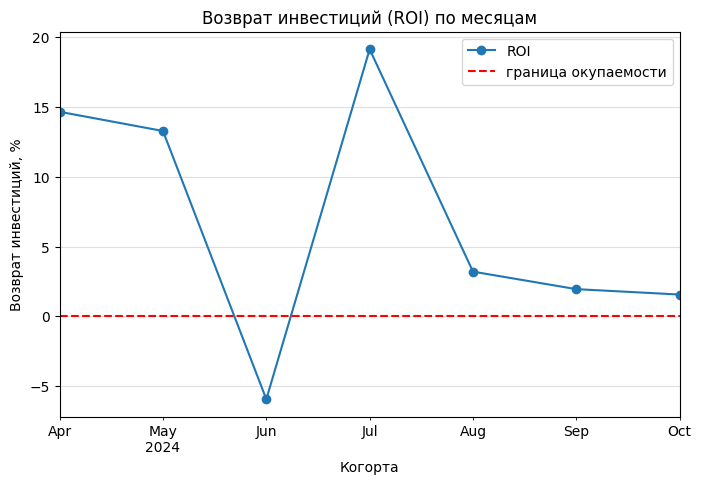

In [37]:
metrics_df.set_index('first_month')['ROI'].plot(
    kind='line',
    marker='o',
    title='Возврат инвестиций (ROI) по месяцам',
    xlabel='Когорта',
    ylabel='Возврат инвестиций, %',
    figsize=(8,5)

)
plt.axhline(y=0,color='red',linestyle ='--')
plt.legend(['ROI','граница окупаемости'])
plt.grid(alpha=0.4)
plt.show()

По полученным расчетам и визулизациям можно отметить рост метрик CAC и LTV в когортах с апреля по октябрь. В июле наблюдается локальный пик средней выручки на привлеченного клиента, ROI в июле достигает почти 20%. Вероятно, появление нового трафика в начале лета положительно повлияло на интерес пользователей, и они осуществляли больше покупок в приложении. Однако, в августе-октябре расходы росли быстрее, чем выручка, и в этот период приложение находится на грани окупаемости (+2÷4%). 

## Анализ метрик в разрезе источника привлечения

Теперь необходимо разобраться, какие источники привлечения перспективны, а какие за 28 дней не окупились.

Определим самые популярные источники привлечения:
- Посчитаем общее число привлечённых пользователей для каждого источника.
- Визуализируем динамику набора новых пользователей по дням в каждом источнике.
- Рассчитаем и визуализируем динамику DAU, MAU и Stickiness по источникам привлечения.



In [38]:
#Рассчитаем количество привлеченных пользователей для каждого источника по месяцам
channels_visits=profiles.groupby('first_channel')['user_id'].nunique().reset_index().rename(columns={'user_id':'users_total'})
channels_visits['share']=channels_visits['users_total']/channels_visits['users_total'].sum()*100
channels_visits.sort_values(by='share',ascending=False)

,first_channel,users_total,share
0,FaceBoom,28401,37.940846
3,TipTop,18118,24.203805
2,RocketSuperAds,14257,19.045901
1,MediaTornado,14080,18.809447


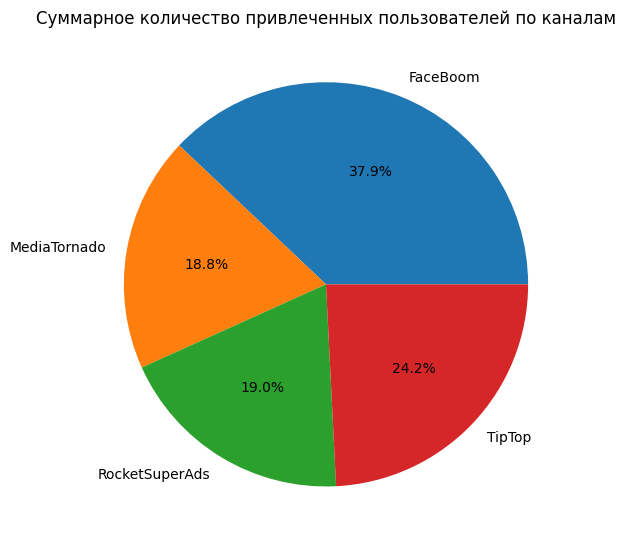

In [39]:
channels_visits.set_index('first_channel')['users_total'].plot(
    kind='pie',
    title='Суммарное количество привлеченных пользователей по каналам',
    ylabel='',  
    autopct='%1.1f%%',
    figsize=(6, 6)
)

plt.tight_layout()
plt.show()

Самая большая доля трафика была привлечена через FaceBoom (38%), на втором месте по величине аудитории TipTop (24%), RocketSuperAds и MediaTornado  сопоставимы по количеству пользователей - 19% и 18,8%, соответственно. 

In [40]:
# Рассчитаем накопительную сумму по пользователям, чтобы построить визуализацию набора новых пользователей, по различным каналам привлечения
profiles=profiles.sort_values(by='first_activity')
new_users=profiles.groupby(['first_channel','first_activity'])['user_id'].nunique().reset_index()
new_users['cumsum']=new_users.groupby('first_channel')['user_id'].cumsum()
new_users_pivot=new_users.pivot(index='first_activity',columns='first_channel',values='cumsum')
new_users_pivot

first_channel,FaceBoom,MediaTornado,RocketSuperAds,TipTop
first_activity,,,,
2024-04-01,133,80,70,73
2024-04-02,227,155,150,150
2024-04-03,360,229,229,226
2024-04-04,465,299,313,292
2024-04-05,575,380,407,368
...,...,...,...,...
2024-11-26,27887,13855,14035,17761
2024-11-27,28021,13908,14094,17854
2024-11-28,28151,13969,14137,17941


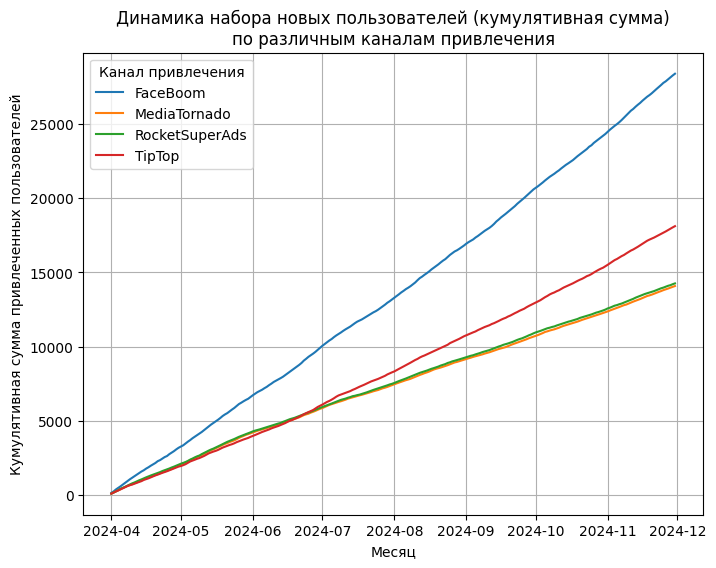

In [41]:
new_users_pivot.plot(
    kind='line',
    xlabel='Месяц',
    ylabel='Кумулятивная сумма привлеченных пользователей',
    title='Динамика набора новых пользователей (кумулятивная сумма)\nпо различным каналам привлечения',
    figsize=(8,6),
    grid=True,
)
plt.legend(title='Канал привлечения')
plt.show()

По графику динамики набора новых пользователей можно отметить, что скорость набора пользователей через FaceBoom самая высокая, на втором месте по скорости набора пользователей - TipTop. Остальные два рекламных канала привлекают новых пользователей с одинаковой умеренной скоростью. Через все 4 канала скорость набора плавная, равномерная, без участков плато и скачков. 

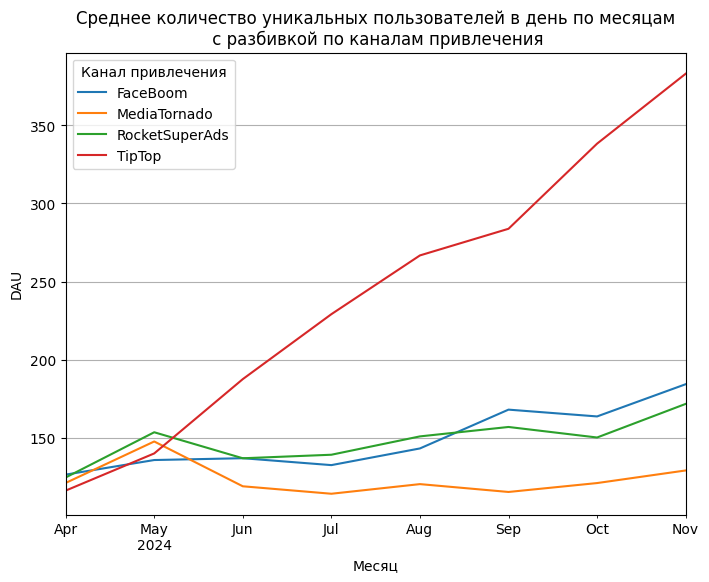

In [42]:
#Рассчитаем DAU и среднее DAU по месяцам
dau_channels=visits.groupby(['first_channel','session_start'])['user_id'].nunique().reset_index()
dau_channels['first_month']=pd.to_datetime(dau_channels['session_start']).dt.to_period('M')
mean_dau=dau_channels.pivot_table(index='first_month',columns='first_channel',values='user_id',aggfunc='mean')
mean_dau.plot(
    kind='line',
    title='Среднее количество уникальных пользователей в день по месяцам\n с разбивкой по каналам привлечения',
    xlabel='Месяц',
    ylabel='DAU',
    grid=True,figsize=(8,6)
)
plt.legend(title='Канал привлечения')
plt.show()

По графику среднего DAU по месяцам можем отметить, что все каналы, кроме TipTop не обеспечивают существенного роста количества уникальных пользователей в день. Метрика для TipTop выросла с ~100 до >350 за исследуемый период. Для остальных каналов метрика практически не менялась (MediaTornado, около 120) или немного выросла (RocketSuperAds от 125 до 171, FaceBoom от 126 до 184). 

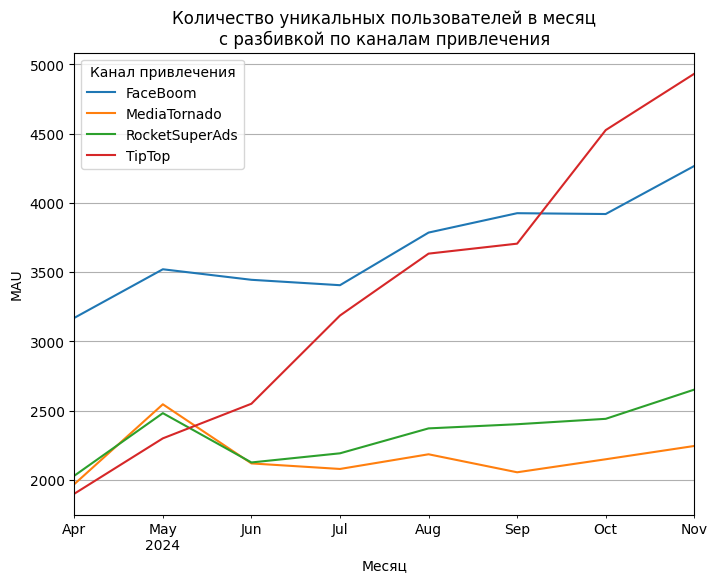

In [43]:
mau_channels=visits.pivot_table(index='session_month',columns='first_channel',values='user_id',aggfunc='nunique')
mau_channels.plot(
    kind='line',
    title='Количество уникальных пользователей в месяц\nс разбивкой по каналам привлечения',
    xlabel='Месяц',
    ylabel='MAU',
    grid=True,figsize=(8,6),
    legend=True
)
plt.legend(title='Канал привлечения')
plt.show()

По графику MAU можем отметить, что самый быстрый и высокий рост показывает TipTop - c ~1900 до ~5000. Метрика для FaceBoom выросла с ~3200 до ~4300. Для остальных каналов метрика немного выросла (MediaTornado от ~1900 до ~2200, RocketSuperAds от ~2000 до ~2600) и имела локальный пик в мае - около 2500 для обоих каналов. 

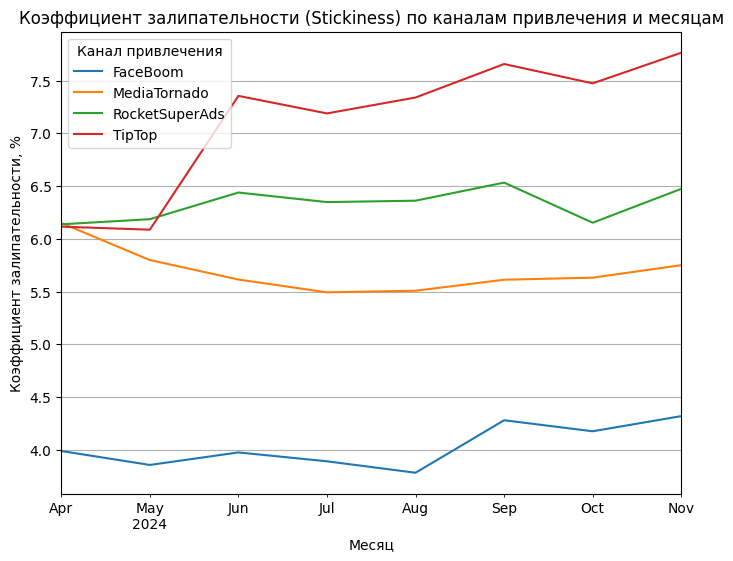

In [44]:
stickiness_channels=mean_dau/mau_channels*100
stickiness_channels.plot(
    kind='line',
    title='Коэффициент залипательности (Stickiness) по каналам привлечения и месяцам',
    xlabel='Месяц',
    ylabel='Коэффициент залипательности, %',
    grid=True,figsize=(8,6)
)
plt.legend(title='Канал привлечения')

По графикам метрик MAU и Stickiness можно отметить, что FaceBoom привлекает большое количество пользователей, но из них малое количество посещает приложение регулярно, и коэффициент залипательности этого канала привлечения почти не показывает роста и составляет около 4%. Для пользователей, привлеченных через MediaTornado и RocketSuperAds,коэффициенты от 5,5 до 6% и от 6 до 6,5% - относительно стабильны в течение наблюдаемого периода. Наилучшие показатели коэффициента залипательности - через канал привлечения TipTop, он растет с около 6% в апреле до >7,5% в ноябре. Можно также отметить, что Stickiness канала TipTop увеличился одновременно с появлением нового контента в начале лета года - с него пришла "правильная, заинтересованная аудитория".

Изучим динамику изменения метрик на 28-й день в разрезе источника. Проведем анализ с выделением недельных когорт по дате привлечения. Рассчитаем:
- Скользящее удержание на 14-й день с момента привлечения (за период с 14-го по 28-й день).
- Конверсию в покупку.
- Недельную динамику затрат на маркетинг по каждому источнику привлечения.
- Динамику среднего CAC, значений LTV и ROI.

In [45]:
#Добавим столбец с неделей когорты (начало недели)
visits['week_cohort']=pd.to_datetime(visits['first_activity']).dt.to_period('W').dt.start_time

In [46]:
# Рассчитаем количество пользователей в каждой недельной когорте
weekly_cohorts=visits.groupby(['week_cohort','first_channel'])['user_id'].nunique().reset_index().rename(columns={'user_id':'cohort_size'})

In [47]:
#Добавим столбец - "возраст" сессии
visits['session_age'] = (pd.to_datetime(visits['session_start']) - pd.to_datetime(visits['first_activity'])).dt.days
#Отфильтруем сессии по возрасту, чтобы выделить те, которые произошли с 14го по 28ой день, рассчитаем количество пользователей, посещавших приложение в этот период
retention_14_28_days=visits[(visits['session_age'] >= 13) & (visits['session_age'] <= 27)].groupby(['week_cohort','first_channel'])['user_id'].nunique().reset_index()
retention_14_28_days=retention_14_28_days.rename(columns={'user_id':'retained_users'})


In [48]:
#Объединим с данными о величине недельных когорт
retention_14_28_days=pd.merge(retention_14_28_days,weekly_cohorts, on=['week_cohort','first_channel'],how='left')


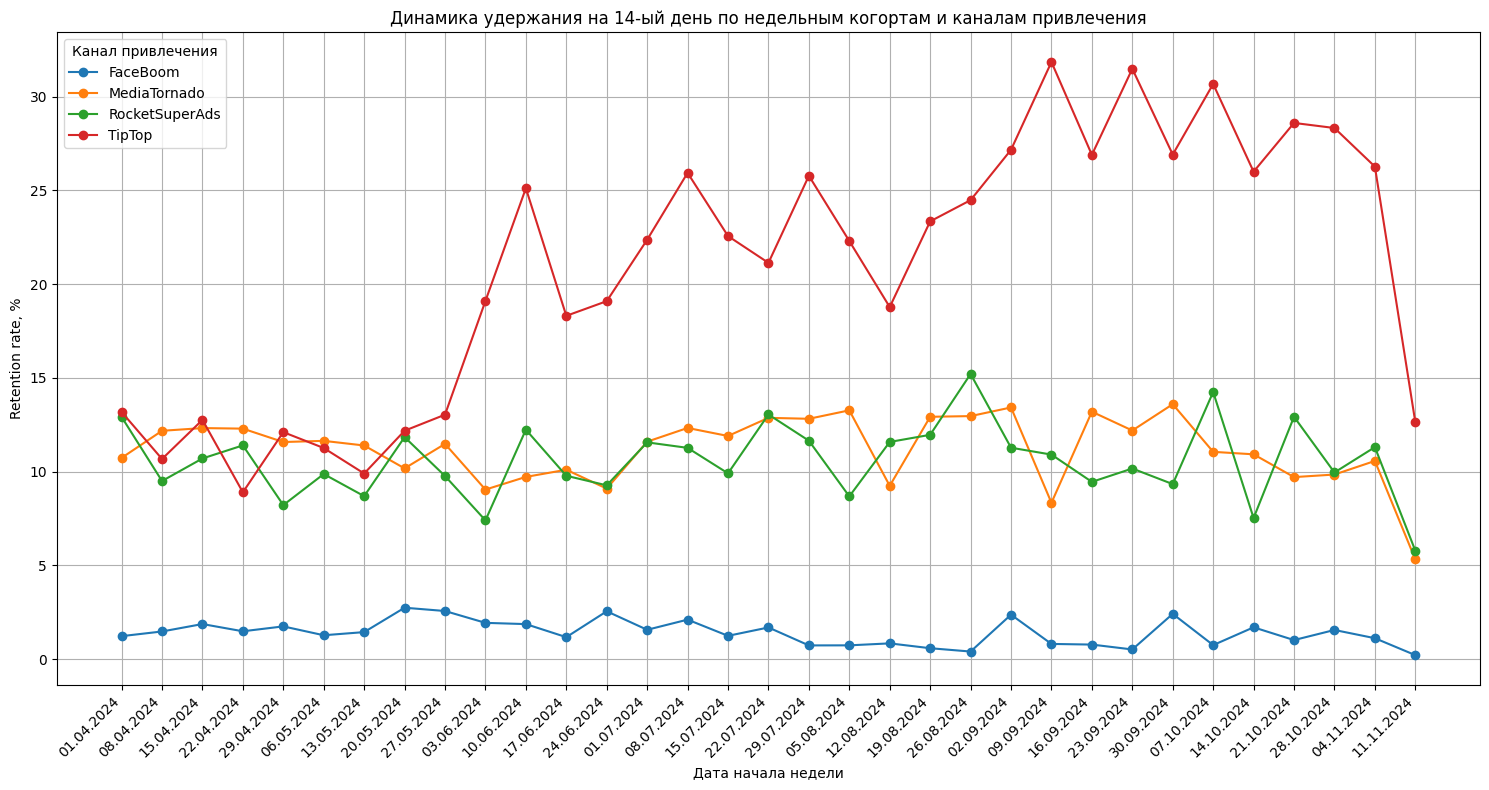

In [49]:
#Рассчитаем коэффициент удержания пользователей на 14-28 дни для всех когорт
retention_14_28_days['retention_rate']=retention_14_28_days['retained_users']/retention_14_28_days['cohort_size']*100
#Соберем в сводную таблицу и визуализируем
retention_14_28_days_pivot=retention_14_28_days.pivot(index='week_cohort',columns='first_channel',values='retention_rate')
retention_14_28_days_pivot.index = retention_14_28_days_pivot.index.strftime('%d.%m.%Y')

ax = retention_14_28_days_pivot.plot(
    kind='line',
    title='Динамика удержания на 14-ый день по недельным когортам и каналам привлечения',
    xlabel='Дата начала недели',
    ylabel='Retention rate, %',
    grid=True,
    figsize=(15, 8),
    marker='o'
)

ax.set_xticks(range(len(retention_14_28_days_pivot)))
ax.set_xticklabels(retention_14_28_days_pivot.index, rotation=45,ha='right')
plt.legend(title='Канал привлечения')
plt.tight_layout()
plt.show()

Полученный график демонстрирует, что пользователи, привлеченные через канал TipTop чаще остальных возвращаются в приложение с 14 по 28 день (от около 10% в апреле и мае до 20-25% летом и 25-30% осенью). Удержание пользователей у остальных каналов относительно стабильно и составляет около 10% для MediaTornado и RocketSuperAds и около 1-3% для FaceBoom. Через последний канал привлекается наименее качественный трафик, очень малая доля пользователей возвращается после 2 недель использования приложения. 

In [50]:
convertion_weekly=pd.merge((visits[['user_id','first_channel','week_cohort']].drop_duplicates()),orders,on='user_id',how='inner').groupby(['week_cohort','first_channel']).agg({'user_id':'nunique'}).rename(columns={'user_id':'buyers'}).reset_index()


In [51]:
convertion_weekly=pd.merge(convertion_weekly,weekly_cohorts, on=['week_cohort','first_channel'])

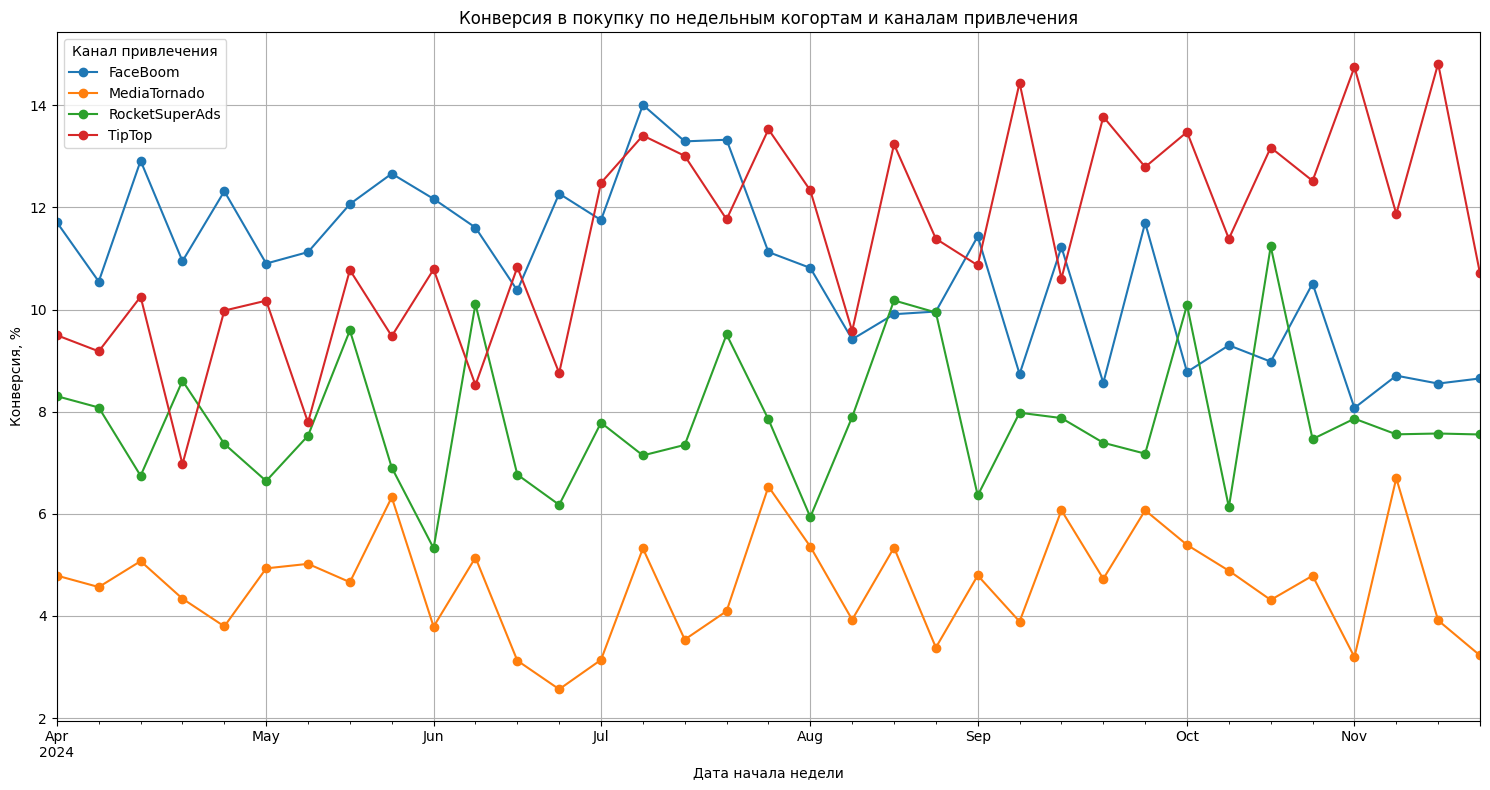

In [52]:
convertion_weekly['convertion']=convertion_weekly['buyers']/convertion_weekly['cohort_size']*100
convertion_weekly_pivot=convertion_weekly.pivot(index='week_cohort',columns='first_channel',values='convertion')
convertion_weekly_pivot.plot(
    kind='line',
    title='Конверсия в покупку по недельным когортам и каналам привлечения',
    xlabel='Дата начала недели',
    ylabel='Конверсия, %',
    grid=True,
    figsize=(15, 8),
    marker='o'
)

ax.set_xticks(range(len(convertion_weekly_pivot)))
ax.set_xticklabels(convertion_weekly_pivot.index, rotation=45,ha='right')
plt.legend(title='Канал привлечения')
plt.tight_layout()
plt.show()


Конверсия в покупку среди пользователей, привлеченных через FaceBoom немного падает с ~12% в апреле-августе до ~10% в сентябре-ноябре. Конверсия по каналу RocketSuperAds колеблется от 6 до 10% в течение рассматриваемого периода, видимого тренда к увеличению или уменьшению нет. Аналогично - MediaTornado - самое низкое значение конверсии по каналам привлечения - от 3 до 6%, без видимого тренда. По каналу TipTop наблюдается рост конверсии с 7-11% в апреле-июне до 11-14% в июле и позднее. Пользователи, привлеченные через этот канал, чаще других совершают покупки в приложении, и доля покупателей среди привлеченных через TipTop пользователей - растет.  

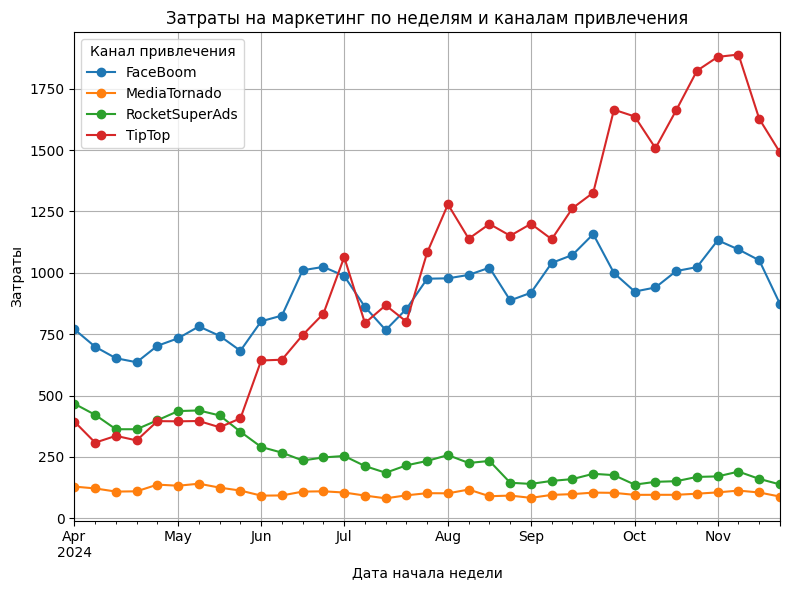

In [53]:
costs['week_cohort']=pd.to_datetime(costs['dt']).dt.to_period('W').dt.start_time
weekly_channel_costs=costs.groupby(['channel','week_cohort'])['costs'].sum().reset_index().pivot(index='week_cohort',columns='channel',values='costs')
weekly_channel_costs.plot(
    kind='line',
    title='Затраты на маркетинг по неделям и каналам привлечения',
    xlabel='Дата начала недели',
    ylabel='Затраты',
    grid=True,
    figsize=(8, 6),
    marker='o'
)

ax.set_xticks(range(len(weekly_channel_costs)))
ax.set_xticklabels(weekly_channel_costs.index, rotation=45,ha='right')
plt.legend(title='Канал привлечения')
plt.tight_layout()
plt.show()

На графике видим, что затраты на маркетинг по различным каналам существенно отличаются между собой. Расходы по каналам MediaTornado и RocketSuperAds принимают самые низкие значения, MediaTornado стабильно обходится компании в около 100 у.е., RocketSuperAds имеет тренд к снижению - с 350-450 у.е. в апреле-мае до 150-200 у.е. в октябре-ноябре. 

Расходы на маркетинг в FaceBoom плавно растут от ~750 у.е. в апреле-июне до ~900-1100 у.е. с июня по ноябрь. 

Расходы на маркетинг в TipTop демонстрируют более быстрый рост - с ~300-400 у.е. в апреле-июне до ~1500-1800 у.е. в октябре-ноябре.

### Динамика среднего CAC, значений LTV и ROI.


In [54]:
weekly_cohorts_pivot=weekly_cohorts.pivot(index='week_cohort',columns='first_channel',values='cohort_size')

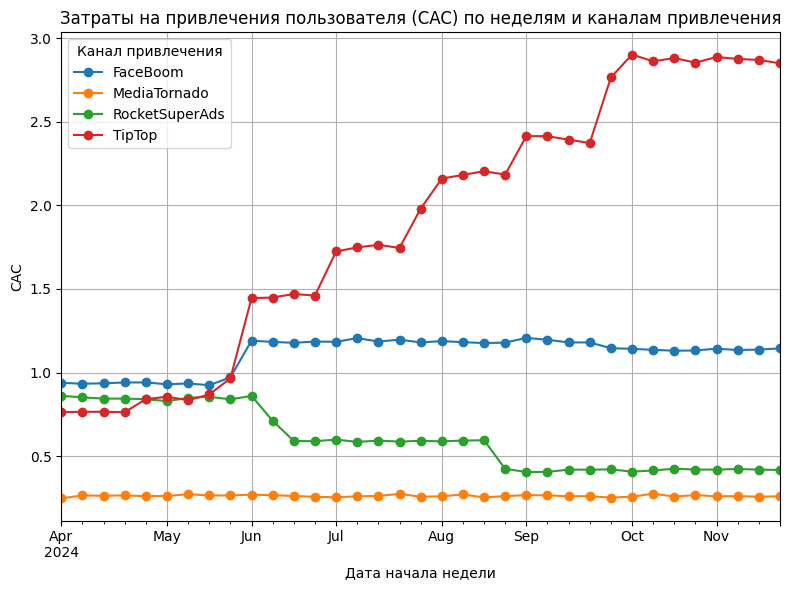

In [55]:
weekly_channel_cac=weekly_channel_costs/weekly_cohorts_pivot
weekly_channel_cac.plot(    
    kind='line',
    title='Затраты на привлечения пользователя (CAC) по неделям и каналам привлечения',
    xlabel='Дата начала недели',
    ylabel='CAC',
    grid=True,
    figsize=(8, 6),
    marker='o'
)

ax.set_xticks(range(len(weekly_channel_cac)))
ax.set_xticklabels(weekly_channel_cac.index, rotation=45,ha='right')
plt.legend(title='Канал привлечения')
plt.tight_layout()
plt.show()

Затраты на привлечение пользователя (CAC) имеет схожую динамику с предыдущим графиком:
 - MediaTornado - метрика стабильно низкая - около 0.2
 - RocketSuperAds - метрика падает с 0.8 в апреле-мае сначала до 0.6 в июне-августе и до 0.4 в сентябре-ноябре
 - FaceBoom - CAC в апреле-мае около 0.9, а с июня до ноября - около 1.2
 - TipTop - CAC растет с 0.8 в апреле-мае до 2.8 в октябре-ноябре. также можно обратить внимание на "скачки" в первую неделю месяца, а затем в течение месяца метрика стабильна. Возможно, это связано с цикличностью маркетинговой активности, привязанную к бюджетным циклам и KPI-отчетности. В предыдущем графике также можно заметить пики в начале июля, августа, октября и ноября, что согласуется с этим предположением. 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2596\4072897589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_28_days['week_cohort']=pd.to_datetime(orders_28_days['first_activity']).dt.to_period('W').dt.start_time


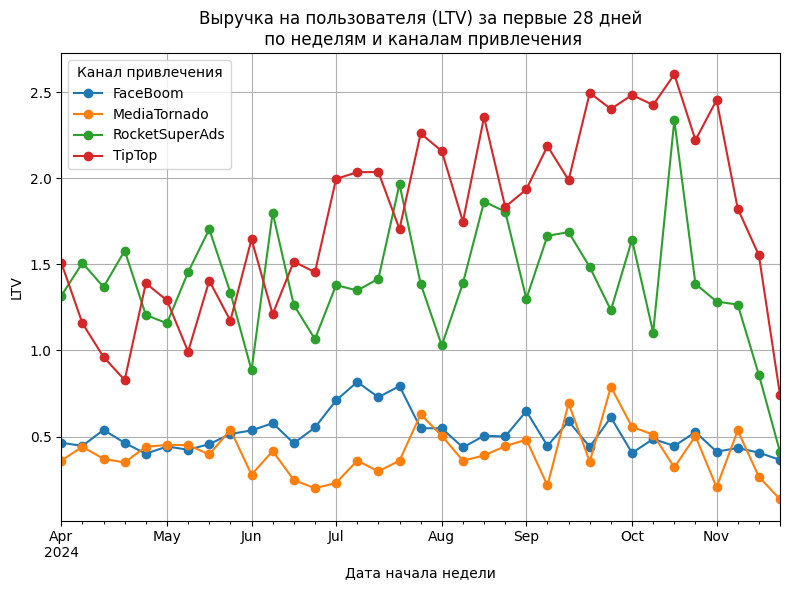

In [56]:
orders_28_days['week_cohort']=pd.to_datetime(orders_28_days['first_activity']).dt.to_period('W').dt.start_time
weekly_channel_ltv=orders_28_days.groupby(['first_channel','week_cohort'])['revenue'].sum().reset_index().pivot(index='week_cohort',columns='first_channel',values='revenue')/weekly_cohorts_pivot
weekly_channel_ltv.plot(    
    kind='line',
    title='Выручка на пользователя (LTV) за первые 28 дней\n по неделям и каналам привлечения',
    xlabel='Дата начала недели',
    ylabel='LTV',
    grid=True,
    figsize=(8, 6),
    marker='o'
)

ax.set_xticks(range(len(weekly_channel_ltv)))
ax.set_xticklabels(weekly_channel_ltv.index, rotation=45,ha='right')
plt.legend(title='Канал привлечения')
plt.tight_layout()
plt.show()

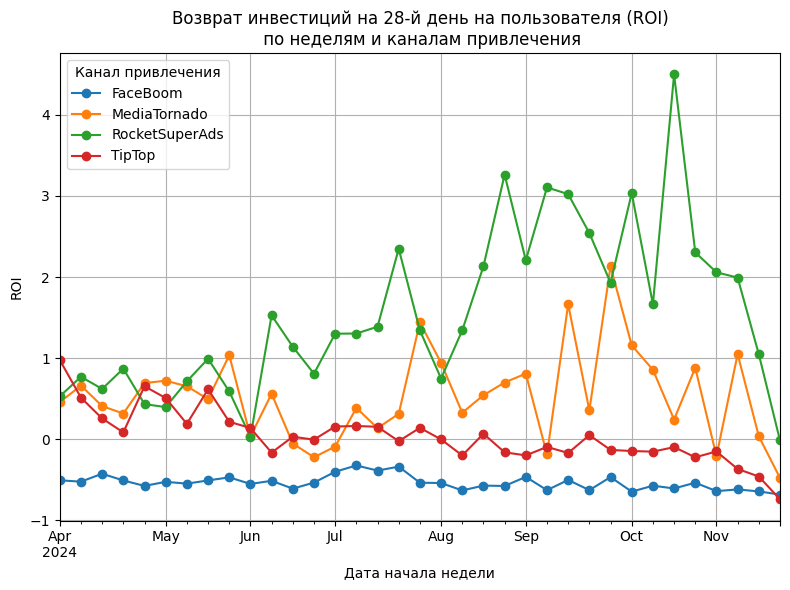

In [57]:
weekly_channel_roi=(weekly_channel_ltv-weekly_channel_cac)/weekly_channel_cac
weekly_channel_roi.plot(    
    kind='line',
    title='Возврат инвестиций на 28-й день на пользователя (ROI)\n по неделям и каналам привлечения',
    xlabel='Дата начала недели',
    ylabel='ROI',
    grid=True,
    figsize=(8, 6),
    marker='o'
)

ax.set_xticks(range(len(weekly_channel_roi)))
ax.set_xticklabels(weekly_channel_roi.index, rotation=45,ha='right')
plt.legend(title='Канал привлечения')
plt.tight_layout()
plt.show()

На полученном графике видно, что возврат инвестиций через канал FaceBoom стабильно меньше нуля (примерно -0.5), через TipTop - в апреле-мае немного выше нуля, а с июня около нуля и ниже - до -0.4 ÷ -0.7 к концу периода. 
Вложения в привлечение клиентов через MediaTornado почти для всех когорт окупаются, ROI составляет от -0.5 до +2.1. ROI канала RocketSuperAds для всех когорт, кроме одной, положителен и демонстрирует рост до значений +2÷4 к концу периода. 

## Выводы по каналам привлечения

#### FaceBoom
- Общая характеристика: Крупнейший источник трафика по объёму привлечения (самая высокая скорость набора пользователей). Однако демонстрирует худшие качественные показатели.

- Динамика и активность: MAU растёт, но DAU и Stickiness (4%) остаются низкими. Это указывает на приток «холодной», нелояльной аудитории, которая редко возвращается в приложение.

- Удержание: Критически низкое удержание на 14-28 день (1-3%). Пользователи быстро теряют интерес.

- Конверсия: Конверсия в покупку относительно высока (10-12%), но постепенно снижается.

- Экономика: CAC стабильно высок (~1.0-1.2). LTV недостаточен для окупаемости. ROI стабильно отрицательный (около -50%), что означает, что канал не окупается за 28 дней.

- Заключение: Канал привлекает много пользователей, но очень низкого качества. Трафик не удерживается и не окупается в заданный период. Возможные причины: некорректная аудитория или нерелевантный креатив.

#### TipTop
- Общая характеристика: Самый перспективный канал с точки зрения качественного роста и вовлечённости аудитории.

- Динамика и активность: Показывает взрывной рост по всем метрикам: MAU, DAU и, что важнее всего, Stickiness (вырос с 6% до >7.5%). Пользователи активны и регулярно возвращаются.

- Удержание: Наилучшее удержание на 14-28 день, с выраженным ростом с ~10% до 25-30%. Пользователи успешно «онбордятся» и остаются в продукте.

- Конверсия: Конверсия в покупку высокая и растёт (с 7-11% до 11-14%).

- Экономика: Основная проблема. CAC демонстрирует резкий рост (с ~0.8 до ~2.8), опережая рост LTV. В результате ROI падает с положительных значений в апреле-мае до околонулевых и отрицательных (до -40 ÷ -70%) к концу периода. Канал перестал окупаться в ожидаемый срок.

- Заключение: Канал привлекает идеальную с точки зрения поведения аудиторию, но стоимость привлечения стала чрезмерной. Не окупается за 28 дней в последние месяцы из-за завышенного CAC. Необходимо оптимизировать расходы на рекламу, чтобы вернуть положительный ROI.

#### RocketSuperAds
- Общая характеристика: Стабильный и эффективный канал с положительной финансовой динамикой.

- Динамика и активность: Показатели MAU, DAU и Stickiness (~6-6.5%) растут умеренно и стабильно.

- Удержание: Удержание на 14-28 день стабильно на среднем уровне (~10%).

- Конверсия: Конверсия в покупку колеблется на среднем уровне (6-10%).

- Экономика: Ключевое преимущество — успешная оптимизация затрат. CAC последовательно снижается (с 0.8 до 0.4). При этом LTV остаётся стабильным или растёт. ROI положительный и показывает уверенный рост до высоких значений (2-4) к концу периода. Канал стабильно окупается.

- Заключение: Наиболее эффективный канал с точки зрения возврата инвестиций. При снижении стоимости привлечения сохраняется качество трафика. Может рассматриваться как эталон для масштабирования.

#### MediaTornado
- Общая характеристика: Низкобюджетный канал с минимальными вложениями и переменной, но в целом положительной окупаемостью.

- Динамика и активность: Самые скромные и стабильные показатели MAU, DAU и Stickiness (~5.5-6%).

- Удержание: Удержание на 14-28 день стабильно на низком уровне (~10%).

- Конверсия: Худшая конверсия в покупку среди всех каналов (3-6%).

- Экономика: Имеет самый низкий CAC (около 0.2). LTV также невысок, но в большинстве недель превышает затраты. ROI в основном положительный, хотя и волатильный (от -50% до +210%). В целом канал окупается за 28 дней.

- Заключение: Канал работает как дополнительный источник трафика с минимальными рисками. Низкая конверсия компенсируется крайне низкой стоимостью привлечения. Эффективен для поддержания общего объёма аудитории.

## Анализ периода окупаемости маркетинговых вложений

Для источников, которые к 28-му дню не выходят на уровень окупаемости, рассчитаем и визуализируем в виде тепловой карты значения ROI за 8 недель.

Разделим данные на недельные когорты по дате привлечения, в качестве интервала наблюдений используем недели.


In [58]:
#добавим столбец - недельную когорту
users_orders['week_cohort']=pd.to_datetime(users_orders['first_activity']).dt.to_period('W').dt.start_time

In [59]:
#добавим столбец - с номером недели после первой активности пользователя
users_orders['n_week']=users_orders['event_dt'].dt.to_period('W').dt.start_time.dt.isocalendar().week-users_orders['week_cohort'].dt.isocalendar().week

In [60]:
#Отфильтруем заказы, сделанные в течение 8 недель после первой активности
orders_8_weeks=users_orders[users_orders['n_week']<=8].groupby(['week_cohort','n_week','first_channel'])['revenue'].sum().reset_index()

In [61]:
#Отфильтруем по двум каналам привлечения
orders_8_weeks_FB=orders_8_weeks[orders_8_weeks['first_channel']=='FaceBoom']
orders_8_weeks_TT=orders_8_weeks[orders_8_weeks['first_channel']=='TipTop']

In [62]:
#Для некоторых каналов и недель отсутствуют покупки - добавим недостающие номера недель в датасет
weeks = orders_8_weeks[['week_cohort', 'n_week']].drop_duplicates()


In [63]:
# Объединим для добавления пропусков
roi_FB = weeks.merge(
    orders_8_weeks_FB[['week_cohort', 'n_week', 'revenue']],
    on=['week_cohort', 'n_week'],
    how='left'
)
roi_FB['revenue']=roi_FB['revenue'].fillna(0)

roi_TT = weeks.merge(
    orders_8_weeks_TT[['week_cohort', 'n_week', 'revenue']],
    on=['week_cohort', 'n_week'],
    how='left'
)
roi_TT['revenue']=roi_TT['revenue'].fillna(0)

In [64]:
roi_TT

,week_cohort,n_week,revenue
0,2024-04-01,0,272.76
1,2024-04-01,1,221.46
2,2024-04-01,2,153.12
3,2024-04-01,3,119.64
4,2024-04-01,4,55.33
...,...,...,...
274,2024-11-11,1,460.67
275,2024-11-11,2,245.32
276,2024-11-18,0,524.97
277,2024-11-18,1,355.52


In [65]:
#Рассчитаем кумулятивную сумму выручки по каждому из рассматриваемых каналов, по когортам
roi_FB['LTV']=roi_FB.groupby('week_cohort')['revenue'].cumsum()
roi_FB=roi_FB.set_index('week_cohort')

roi_TT['LTV']=roi_TT.groupby('week_cohort')['revenue'].cumsum()
roi_TT=roi_TT.set_index('week_cohort')


In [66]:
weekly_cohorts=weekly_cohorts.set_index('week_cohort')

In [67]:
#Добавим данные о расходах на привлечение и рассчитаем возврат инвестиций
roi_FB['CAC']=weekly_channel_cac['FaceBoom']*weekly_cohorts[weekly_cohorts['first_channel']=='FaceBoom']['cohort_size']
roi_FB['ROI']=roi_FB['LTV']/roi_FB['CAC']-1
roi_FB=roi_FB.reset_index()

roi_TT['CAC']=weekly_channel_cac['TipTop']*weekly_cohorts[weekly_cohorts['first_channel']=='TipTop']['cohort_size']
roi_TT['ROI']=roi_TT['LTV']/roi_TT['CAC']-1
roi_TT=roi_TT.reset_index()

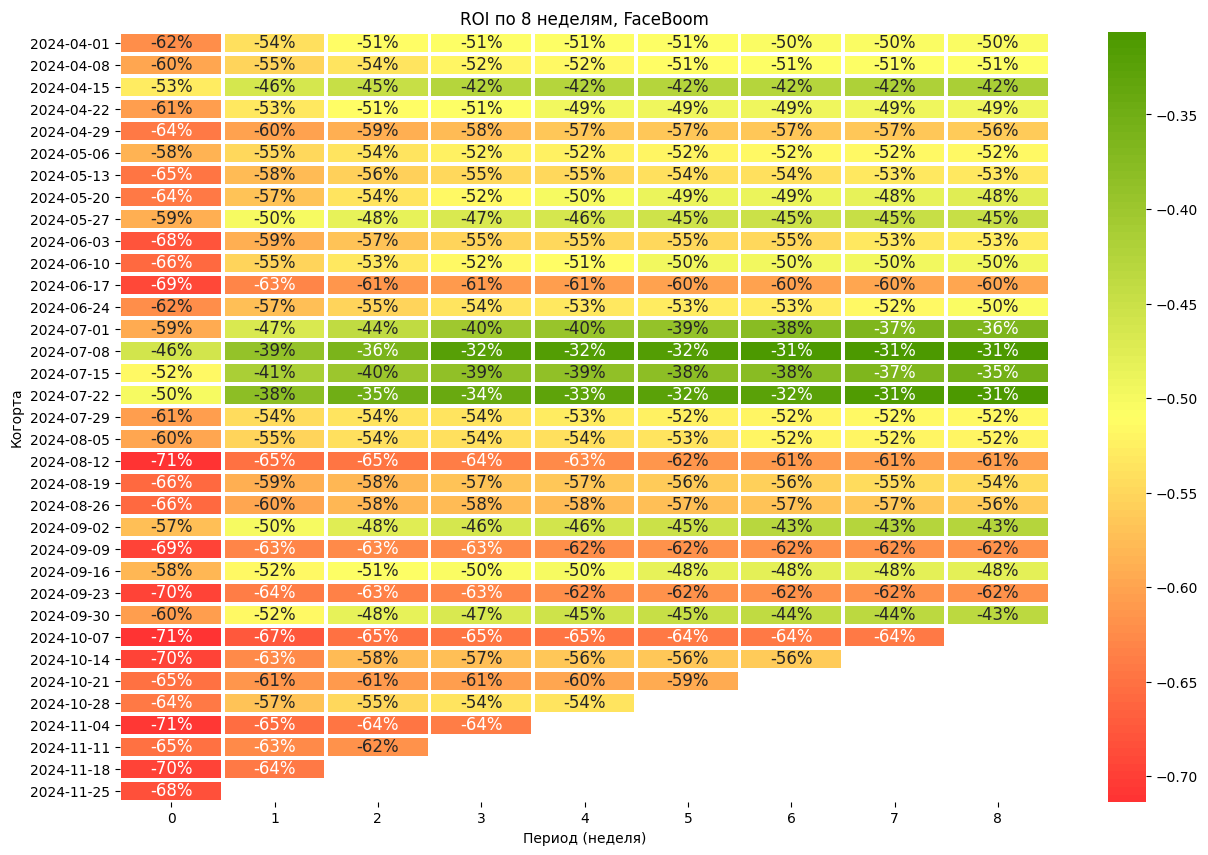

In [68]:
roi_FB_pivot=roi_FB.pivot(columns='n_week',index='week_cohort',values='ROI')

cmap = mcolors.LinearSegmentedColormap.from_list('green_red', ['#FF3333', '#FFFF66', '#4C9900'], N=100)

roi_FB_pivot.index = roi_FB_pivot.index.strftime('%Y-%m-%d')


plt.figure(figsize=(15, 10))

sns.heatmap(
    data=roi_FB_pivot,
    cmap=cmap,
    annot=True,
    fmt='.0%',
    linewidths=2,
annot_kws={"size": 12}
)

plt.title('ROI по 8 неделям, FaceBoom')
plt.xlabel('Период (неделя)')
plt.ylabel('Когорта')
plt.show()

График демонстрирует, что для всех когорт даже за 8 недель канал FaceBoom не окупается. В июле есть 4 когорты, где ROI выше, чем для остальных, хотя всё еще отрицателен. Это может быть связано в том числе с появлением летом нового контента. Можно рассмотреть подробнее этот период на предмет возможных инсайтов по улучшению ROI данного рекламного канала. 

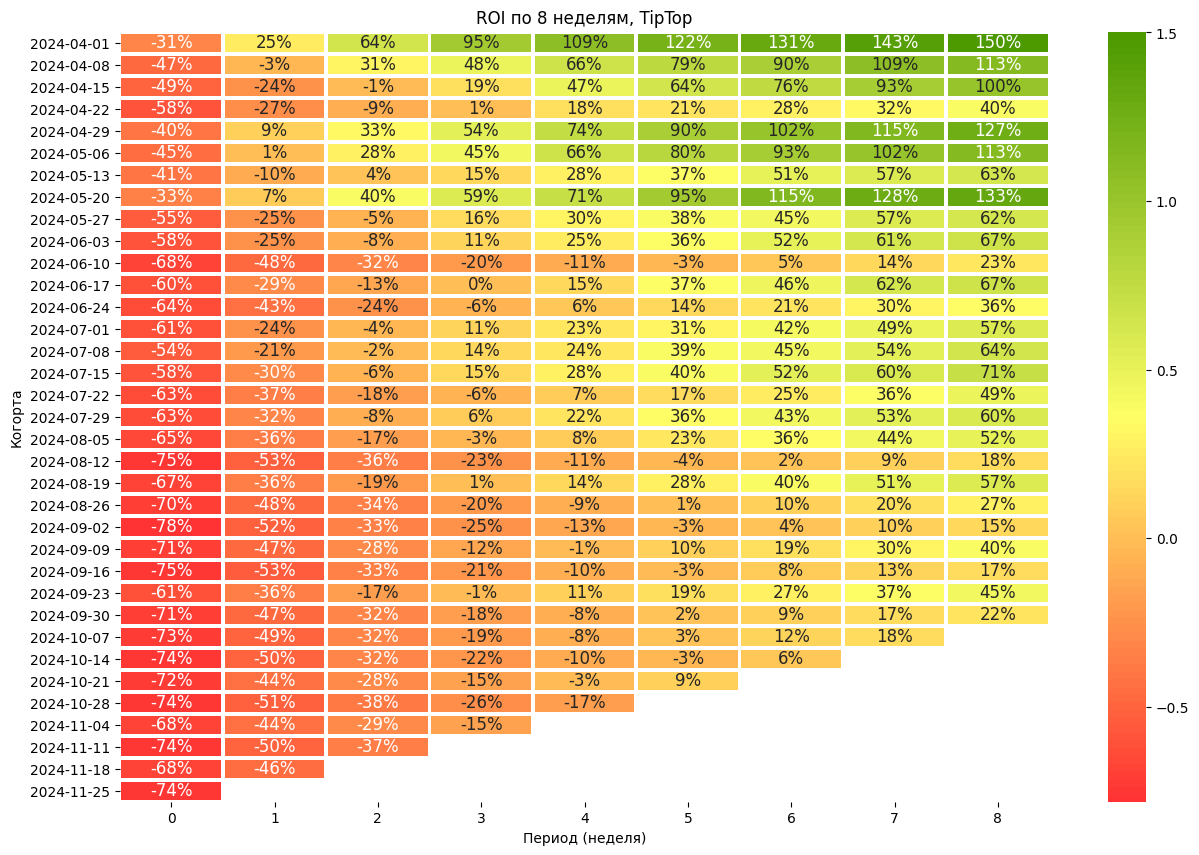

In [69]:
roi_pivot_TT=roi_TT.pivot(columns='n_week',index='week_cohort',values='ROI')

cmap = mcolors.LinearSegmentedColormap.from_list('green_red', ['#FF3333', '#FFFF66', '#4C9900'], N=100)

roi_pivot_TT.index = roi_pivot_TT.index.strftime('%Y-%m-%d')

plt.figure(figsize=(15, 10))

sns.heatmap(
    data=roi_pivot_TT,
    cmap=cmap,
    annot=True,
    fmt='.0%',
    linewidths=2,
annot_kws={"size": 12}
)

plt.title('ROI по 8 неделям, TipTop')
plt.xlabel('Период (неделя)')
plt.ylabel('Когорта')
plt.show()

График демонстрирует ухудшение окупаемости через канал TipTop в течение рассматриваемого периода. Если в апреле-мае привлечение через этот канал выходит на окупаемость через 1-3 недели после привлечения, а к 8 неделе возврат инвестиций для большей части когорт достигает +100÷140%, то затем показатель снижается, и к концу августа канал доходит до границы окупаемости только к 5-6 неделе после привлечения. Необходимо пересмотреть стоимость затрат на привлечение пользователей, поскольку канал привлекает качественный трафик, но обходится компании слишком дорого.  

## Выводы и рекомендации

Сформулируйте общий вывод. Зафиксируйте основные результаты и инсайты. Например, охарактеризуйте аудиторию продукта, покажите распределение маркетинговых затрат по каналам привлечения, опишите каждый канал привлечения. Делайте акцент на сильных и слабых сторонах. Укажите, какие каналы привлечения не вышли на окупаемость и по каким причинам.

Дайте рекомендации отделу маркетинга: опишите, как повысить эффективность вложений в рекламу.


#### Общие выводы о состоянии продукта

- После запуска спортивного контента в начале лета 2024 года наблюдался всплеск интереса к продукту — выросли DAU, MAU, Stickiness и количество новых пользователей. Однако рост выручки замедлился, что указывает на приток "холодной" аудитории с низкой монетизацией.
- Качество трафика сильно варьируется в зависимости от канала привлечения.
- CAC стабильно рос с апреля по ноябрь, достигнув пика в октябре-ноябре.
- LTV также рос, но медленнее, чем CAC, что привело к падению ROI.
- **В августе-октябре 2024 ROI стал почти нулевым — продукт находится на грани окупаемости.**

#### Характеристика каналов привлечения

**1) RocketSuperAds** 

Сильные стороны:

- Стабильное качество трафика (Stickiness 6–6.5%, удержание ~10%).
- CAC снижается с 0.8 до 0.4 — успешная оптимизация.
- ROI на 28ой день стабильно положительный, растёт до +200–400%.

Слабые стороны:

- Не самый масштабный источник по объёму.

Рекомендация: Масштабировать. Канал показывает отличную экономику.


**2) TipTop** 

Сильные стороны:

- Лучшее удержание (до 30% на 14–28 день).
- Высокая и растущая конверсия (до 14%).
- Рост Stickiness (с 6% до 7.5%).

Слабые стороны:

- Резкий рост CAC (с 0.8 до 2.8) — опережает рост LTV.
- ROI упал до отрицательных значений.
- Маркетинговые расходы росли быстрее, чем выручка от пользователей.

Рекомендация: Оптимизировать стоимость привлечения. Снизить ставки, пересмотреть таргетинг, тестировать менее дорогие форматы.

**3) FaceBoom** 

Сильные стороны:

- Самый мощный источник по объёму трафика.

Слабые стороны:

- Критически низкое удержание (1–3%).
- Stickiness — всего 4%
- Конверсия в покупку снижается (с 12% до 10%).
- ROI стабильно отрицательный (-50%) даже через 8 недель.
- Привлекается нецелевая аудитория, нет вовлечения после первого клика.

Рекомендация: Остановить или полностью пересмотреть. 

**4) MediaTornado**

Сильные стороны:

- Самый низкий CAC (0.2).
- Минимальные риски, стабильные вложения.

Слабые стороны:

- Худшая конверсия в покупку (3–6%).
- Удержание низкое (~10%).

Экономика:

- В большинстве когорт ROI положительный, но волатильный.

Рекомендация: Оставить как поддерживающий канал.

#### Каналы, не вышедшие на окупаемость за 28 дней
- FaceBoom - Некачественный трафик, отсутствие удержания, высокий CAC
- TipTop (с августа) - Чрезмерный рост стоимости привлечения при сохранении качества

На тепловых картах ROI для FaceBoom даже за 8 недель нет ни одной когорты с положительной окупаемостью.

Для TipTop — срок окупаемости вырос с 1–2 недель до 5–6 недель к осени, что превышает целевой горизонт (28 дней).

#### Рекомендации отделу маркетинга

- Бюджет на FaceBoom  частично перераспределить в пользу RocketSuperAds и MediaTornado до пересмотра стратегии.
- Оптимизировать затраты на TipTop.
- Увеличить бюджет RocketSuperAds. Канал показывает лучшую экономику — есть потенциал для масштабирования без потери качества.
- Усилить работу с удержанием пользователей. FaceBoom показывает, что мало привести — нужно удержать.